In [1]:
import numpy as np
from scipy.stats import poisson, binom
from math import factorial, exp

from anton_prazdnichnykh_v1 import *
import testing

In [2]:
import matplotlib.pyplot as plt

In [3]:
model = 1

params = {
    'amin': 75,
    'amax': 90,
    'bmin': 500,
    'bmax': 600,
    "p1": 0.1,
    'p2': 0.01,
    'p3': 0.3,
}

In [4]:
a_min, a_max = params['amin'], params['amax']
b_min, b_max = params['bmin'], params['bmax']
p1, p2, p3 = params['p1'], params['p2'], params['p3']
N = 50

In [5]:
n_a = a_max - a_min + 1
n_b = b_max - b_min + 1
n_c = a_max + b_max + 1
n_d = 2 * (a_max + b_max) + 1

# Testing

In [6]:
a = np.arange(a_min, a_max + 1)
b = np.arange(b_min, b_max + 1)
d = np.arange(n_d)

In [7]:
pr_c_a, _ = pc_a(a, params, model)
pr_c_a.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
pr_c_b, _ = pc_a(b, params, model)
pr_c_b.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
pr_c_d, _ = pc_d(d[:50], params, model)
pr_c_d.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
pr_c_abd, _ = pc_abd(a, b, d[:50], params, model)

In [11]:
pr_c_abd.sum(0)

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

# Матожидания и дисперсии

In [11]:
def mean_var(p_distr, *args, **kwargs):
    probs, vals = p_distr(*args, **kwargs)
    vals = vals.reshape(-1, *[1 for _ in range(len(probs.shape) - 1)])
    m = (probs * vals).sum(axis=0)
    d = (probs * vals**2).sum(axis=0) - m**2
    return m, d

In [13]:
#a
mean_var(pa, params, 1)

(82.5, 21.25)

In [14]:
#b
mean_var(pb, params, 1)

(549.9999999999999, 850.0000000000582)

In [15]:
#c1
mean_var(pc, params, model=1)

(13.749999999999904, 13.167500000001013)

In [16]:
#c2
mean_var(pc, params, model=2)

(13.749999999999993, 14.04750000000007)

In [17]:
#d1
mean_var(pd, params, model=1)

(17.87499999999988, 25.140575000001604)

In [18]:
#d2
mean_var(pd, params, model=2)

(17.874999999999993, 26.6277750000001)

In [12]:
a_mean = np.array([round(mean_var(pa, params, 1)[0])])
b_mean = np.array([round(mean_var(pb, params, 1)[0])])
c_mean = np.array([round(mean_var(pc, params, 1)[0])])
d_mean = np.array([round(mean_var(pd, params, 1)[0])])
a_mean, b_mean, c_mean, d_mean

(array([82]), array([550]), array([14]), array([18]))

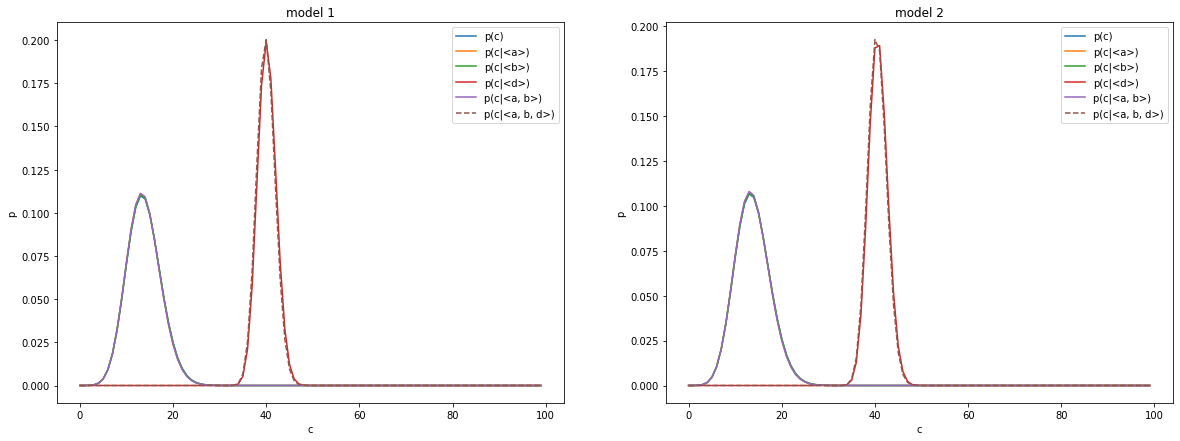

In [16]:
x_lim = 100
d_mean = np.array([60])
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
for model in [1, 2]:
    idx = model - 1
    axs[idx].set_title(f"model {model}")
    axs[idx].plot(pc(params, model)[0][:x_lim], label="p(c)")
    axs[idx].plot(pc_a(a_mean, params, model)[0][:x_lim].squeeze(), label="p(c|<a>)")
    axs[idx].plot(pc_b(b_mean, params, model)[0][:x_lim].squeeze(), label="p(c|<b>)")
    axs[idx].plot(pc_d(d_mean, params, model)[0][:x_lim].squeeze(), label="p(c|<d>)")
    axs[idx].plot(pc_ab(a_mean, b_mean, params, model)[0][:x_lim].squeeze(), label="p(c|<a, b>)")
    axs[idx].plot(pc_abd(a_mean, b_mean, d_mean, params, model)[0][:x_lim].squeeze(), '--', label="p(c|<a, b, d>)")
    axs[idx].set_xlabel('c')
    axs[idx].set_ylabel('p')
    axs[idx].legend()
# plt.savefig("task3.png")
plt.show()

In [17]:
model = 1
c_a_mv = mean_var(pc_a, a_mean, params, model) 
c_b_mv = mean_var(pc_b, b_mean, params, model) 
c_d_mv = mean_var(pc_d, d_mean, params, model) 
c_ab_mv = mean_var(pc_ab, a_mean, b_mean, params, model) 
c_abd_mv = mean_var(pc_abd, a_mean, b_mean, d_mean, params, model) 

In [18]:
for m, v in [c_a_mv, c_b_mv, c_d_mv, c_ab_mv, c_abd_mv]:
    print(f"mean: {m}, varience: {v}")

mean: [13.7], varience: [12.91]
mean: [13.75], varience: [13.0825]
mean: [40.16668236], varience: [3.99536815]
mean: [[13.7]], varience: [[12.825]]
mean: [[[39.97417933]]], varience: [[[3.92017858]]]


In [107]:
model = 2
c_a_mv = mean_var(pc_a, a_mean, params, model) 
c_b_mv = mean_var(pc_b, b_mean, params, model) 
c_d_mv = mean_var(pc_d, d_mean, params, model) 
c_ab_mv = mean_var(pc_ab, a_mean, b_mean, params, model) 
c_abd_mv = mean_var(pc_abd, a_mean, b_mean, d_mean, params, model) 

In [108]:
for m, v in [c_a_mv, c_b_mv, c_d_mv, c_ab_mv, c_abd_mv]:
    print(f"mean: {m}, varience: {v}")

mean: [13.7], varience: [13.785]
mean: [13.75], varience: [13.9625]
mean: [13.89383389], varience: [1.54394333]
mean: [[13.7]], varience: [[13.7]]
mean: [[[13.88897106]]], varience: [[[1.54022854]]]


# Проверка значимости $d$

In [19]:
model = 1
a = np.arange(a_min, a_max + 1)
b = np.arange(b_min, b_max + 1)
d = np.arange(n_d)
c_a_m, c_a_d = mean_var(pc_a, a, params, model)
c_b_m, c_b_d = mean_var(pc_b, b, params, model) 
c_d_m, c_d_d = mean_var(pc_d, d, params, model) 

/home/anton/hse.bayes_course/practice_1/anton_prazdnichnykh_v1.py:74: RuntimeWarning: invalid value encountered in true_divide
  return pr / pr.sum(0), c


In [20]:
c_b_d.shape

(101,)

In [21]:
np.all(np.array([[d_ < b_ for b_ in c_b_d] for d_ in c_d_d]))

False

In [22]:
np.all(np.array([[d_ > a_ for a_ in c_a_d] for d_ in c_d_d]))

False

In [73]:
model = 2
c_a_m, c_a_d = mean_var(pc_a, a, params, model)
c_b_m, c_b_d = mean_var(pc_b, b, params, model) 
c_d_m, c_d_d = mean_var(pc_d, d, params, model) 

c_b_d.shape

(101,)

In [76]:
np.where(np.array([[d_ < b_ for b_ in c_b_d] for d_ in c_d_d]) == 0)

(array([54, 54, 54, ..., 66, 66, 66]),
 array([  0,   1,   2, ...,  98,  99, 100]))

In [80]:
np.where(np.array([[d_ < a_ for a_ in c_a_d] for d_ in c_d_d]) == 0)

(array([54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55,
        55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56,
        56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57,
        57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58,
        58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60,
        60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61,
        61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63,
        63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
        65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,
        66, 66, 66, 66]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13

In [27]:
c_d_d.reshape(-1, 1).dot(c_a_d.reshape(1, -1))

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.55893482e-04, 1.57036023e-04, 1.58178565e-04, ...,
        1.70746525e-04, 1.71889067e-04, 1.73031609e-04],
       [8.89743579e-01, 8.96264501e-01, 9.02785423e-01, ...,
        9.74515565e-01, 9.81036487e-01, 9.87557409e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [41]:
c_d_d[53:65]

array([ 19.40918628,  37.5849257 ,  75.17177299, 146.25500696,
       255.86924201, 363.11009436, 380.43851606, 288.60450307,
       169.84080279,  85.3456783 ,  39.34363806,  17.3229252 ])

In [48]:
c_d_d[:65]

array([0.00000000e+00, 1.26949089e-05, 7.24546888e-02, 1.62627791e-01,
       2.60235530e-01, 3.60196578e-01, 4.60360587e-01, 5.59602476e-01,
       6.57361854e-01, 7.53353176e-01, 8.47448216e-01, 9.39605432e-01,
       1.02983387e+00, 1.11817123e+00, 1.20467132e+00, 1.28939631e+00,
       1.37241210e+00, 1.45378538e+00, 1.53358194e+00, 1.61186561e+00,
       1.68869766e+00, 1.76413648e+00, 1.83823753e+00, 1.91105324e+00,
       1.98263315e+00, 2.05302400e+00, 2.12226987e+00, 2.19041235e+00,
       2.25749071e+00, 2.32354210e+00, 2.38860175e+00, 2.45270327e+00,
       2.51587900e+00, 2.57816058e+00, 2.63957982e+00, 2.70017031e+00,
       2.75997030e+00, 2.81902810e+00, 2.87741246e+00, 2.93523284e+00,
       2.99267940e+00, 3.05010340e+00, 3.10818000e+00, 3.16824286e+00,
       3.23297885e+00, 3.30788748e+00, 3.40438034e+00, 3.54643410e+00,
       3.78501356e+00, 4.22961539e+00, 5.11769672e+00, 6.96771208e+00,
       1.09133375e+01, 1.94091863e+01, 3.75849257e+01, 7.51717730e+01,
      

# Линейная разделимость

In [81]:
a = np.arange(a_min, a_max + 1)
b = np.arange(b_min, b_max + 1)
d = np.arange(n_d)

In [82]:
model = 1
c_a_m, c_a_d = mean_var(pc_a, a, params, model)
c_b_m, c_b_d = mean_var(pc_b, b, params, model) 
c_d_m, c_d_d = mean_var(pc_d, d, params, model) 

In [83]:
b_idx, a_idx = np.where([[b_ < a_ for a_ in c_a_d] for b_ in c_b_d])
bla = np.vstack((a[a_idx], b[b_idx])).T
bla

array([[ 79, 500],
       [ 80, 500],
       [ 81, 500],
       ...,
       [ 90, 598],
       [ 90, 599],
       [ 90, 600]])

In [84]:
b_idx, a_idx = np.where([[b_ >= a_ for a_ in c_a_d] for b_ in c_b_d])
bga = np.vstack((a[a_idx], b[b_idx])).T
bga

array([[ 75, 500],
       [ 76, 500],
       [ 77, 500],
       ...,
       [ 87, 600],
       [ 88, 600],
       [ 89, 600]])

In [85]:
model = 2
c_a_m2, c_a_d2 = mean_var(pc_a, a, params, model)
c_b_m2, c_b_d2 = mean_var(pc_b, b, params, model) 
c_d_m2, c_d_d2 = mean_var(pc_d, d, params, model) 

In [86]:
b_idx, a_idx = np.where([[b_ < a_ for a_ in c_a_d2] for b_ in c_b_d2])
bla2 = np.vstack((a[a_idx], b[b_idx])).T
bla2

array([[ 79, 500],
       [ 80, 500],
       [ 81, 500],
       ...,
       [ 90, 599],
       [ 89, 600],
       [ 90, 600]])

In [87]:
b_idx, a_idx = np.where([[b_ >= a_ for a_ in c_a_d2] for b_ in c_b_d2])
bga2 = np.vstack((a[a_idx], b[b_idx])).T
bga2

array([[ 75, 500],
       [ 76, 500],
       [ 77, 500],
       ...,
       [ 86, 600],
       [ 87, 600],
       [ 88, 600]])

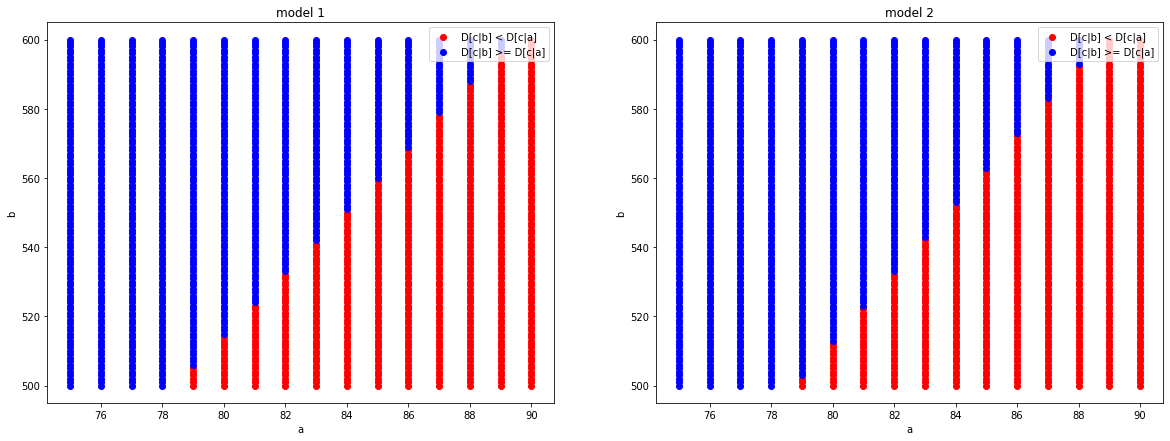

In [90]:
plt.x_lim = 30
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
axs[0].set_title("model 1")
axs[0].set_xlabel("a")
axs[0].set_ylabel("b")
axs[0].scatter(bla[:, 0], bla[:, 1], color='red', label='D[c|b] < D[c|a]')
axs[0].scatter(bga[:, 0], bga[:, 1], color='blue', label='D[c|b] >= D[c|a]')
axs[0].legend()

axs[1].set_title("model 2")
axs[1].set_xlabel("a")
axs[1].set_ylabel("b")
axs[1].scatter(bla2[:, 0], bla2[:, 1], color='red', label='D[c|b] < D[c|a]')
axs[1].scatter(bga2[:, 0], bga2[:, 1], color='blue', label='D[c|b] >= D[c|a]')
axs[1].legend()
plt.savefig("task4.png")
plt.show()

# Замеры времени

In [92]:
model = 1

In [93]:
%%time
pr, v = pc(params, model)

CPU times: user 556 ms, sys: 0 ns, total: 556 ms
Wall time: 555 ms


In [94]:
%%time
pr, v = pc_a(a_mean, params, model)

CPU times: user 52.8 ms, sys: 3.24 ms, total: 56 ms
Wall time: 53.9 ms


In [95]:
%%time
pr, v = pc_b(b_mean, params, model)

CPU times: user 16.8 ms, sys: 128 µs, total: 16.9 ms
Wall time: 15.2 ms


In [96]:
%%time
pr, v = pc_d(d_mean, params, model)

CPU times: user 612 ms, sys: 15.4 ms, total: 628 ms
Wall time: 627 ms


In [97]:
%%time
pr, v = pc_ab(a_mean, b_mean, params, model)

CPU times: user 9.55 ms, sys: 278 µs, total: 9.83 ms
Wall time: 8.37 ms


In [98]:
%%time
pr, v = pc_abd(a_mean, b_mean, d_mean, params, model)

CPU times: user 87.8 ms, sys: 7.9 ms, total: 95.7 ms
Wall time: 93.4 ms


In [99]:
%%time
pr, v = pd(params, model)

CPU times: user 609 ms, sys: 37.5 ms, total: 647 ms
Wall time: 635 ms


In [100]:
model = 2

In [101]:
%%time
pr, v = pc(params, model)

CPU times: user 106 ms, sys: 54.1 ms, total: 160 ms
Wall time: 158 ms


In [102]:
%%time
pr, v = pc_a(a_mean, params, model)

CPU times: user 8.16 ms, sys: 3.21 ms, total: 11.4 ms
Wall time: 10.1 ms


In [103]:
%%time
pr, v = pc_b(b_mean, params, model)

CPU times: user 4.53 ms, sys: 103 µs, total: 4.63 ms
Wall time: 3.53 ms


In [104]:
%%time
pr, v = pc_d(d_mean, params, model)

CPU times: user 163 ms, sys: 39.8 ms, total: 203 ms
Wall time: 201 ms


In [105]:
%%time
pr, v = pc_ab(a_mean, b_mean, params, model)

CPU times: user 240 µs, sys: 3.24 ms, total: 3.48 ms
Wall time: 2.03 ms


In [121]:
%%time
pr, v = pc_abd(a_mean, b_mean, d_mean, params, model)

CPU times: user 58.6 ms, sys: 24.9 ms, total: 83.5 ms
Wall time: 81.5 ms


In [113]:
%%time
pr, v = pd(params, model)

CPU times: user 165 ms, sys: 46.4 ms, total: 211 ms
Wall time: 201 ms
